### Page View Time Series Visualizer

**Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the date column.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('fcc-forum-pageviews.csv', index_col = 'date')
df.head(2)

,value
date,
2016-05-09,1201
2016-05-10,2329




---



**Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.**

In [4]:
df = df[(df['value'] > df['value'].quantile(0.025)) & (df['value'] < df['value'].quantile(0.975))]



---



**Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. The label on the x axis should be Date and the label on the y axis should be Page Views.**

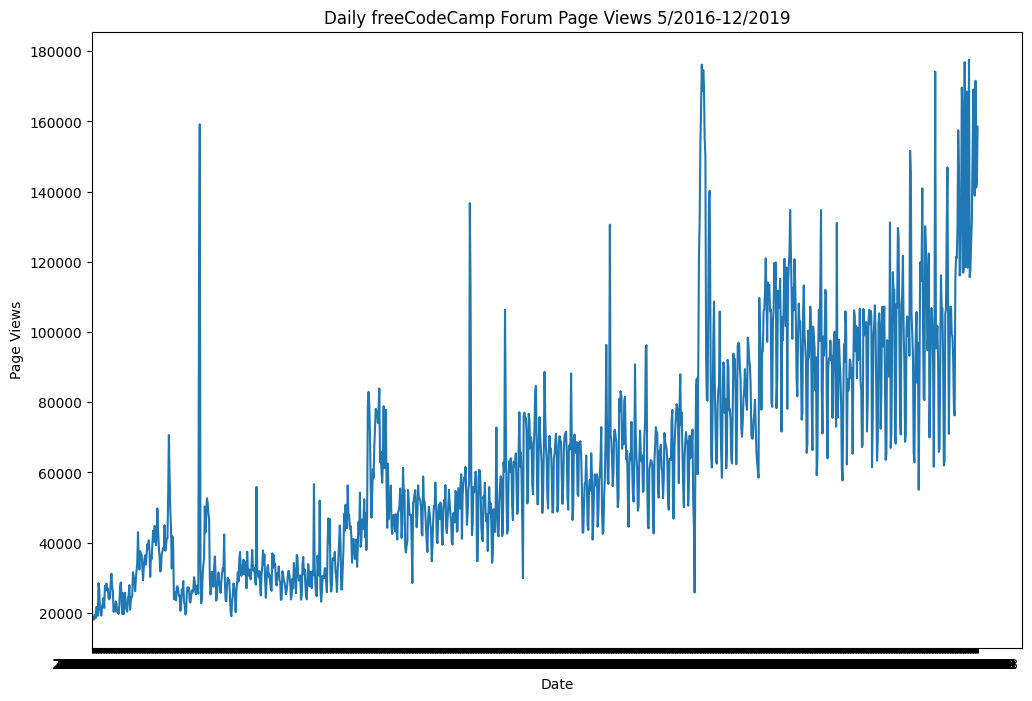

In [5]:
plt.figure(figsize = (12, 8))
plt.plot(df)
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.xlim(4)
plt.show()



---



**Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.**

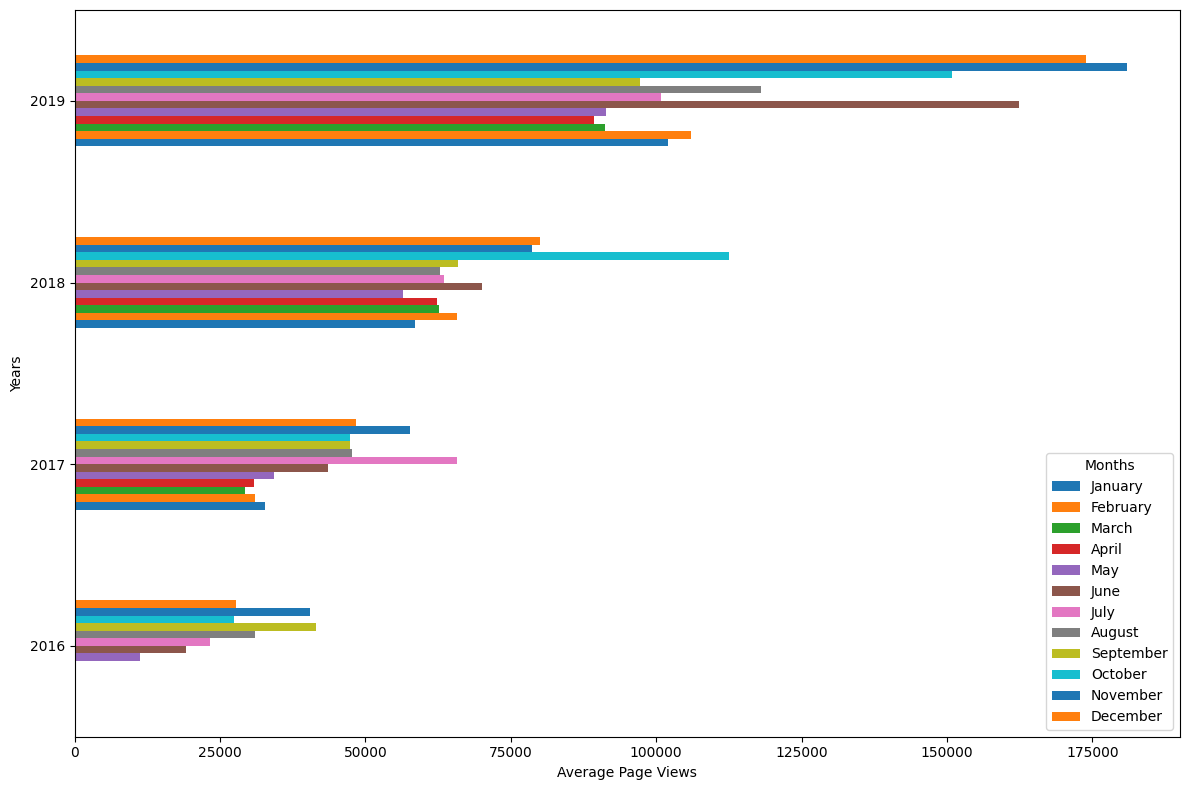

In [12]:
df = pd.read_csv('fcc-forum-pageviews.csv')
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

df_bar = df.groupby(['year', 'month'])['value'].mean().unstack()

fig, ax = plt.subplots(figsize = (12, 8))

df_bar.plot(kind = 'barh', ax = ax)

ax.set_xlabel('Average Page Views')
ax.set_ylabel('Years')

ax.legend(title = 'Months', labels = [
            'January', 'February', 'March', 'April', 'May', 'June',
            'July', 'August', 'September', 'October', 'November', 'December'
        ])

fig.tight_layout()
fig.show()

In [13]:
df_bar

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,11242.695652,19124.366667,23314.225806,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,112592.000000,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,162402.600000,100804.451613,117991.032258,97268.833333,150862.709677,181026.700000,173870.333333




---



**Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. The boilerplate includes commands to prepare the data.**

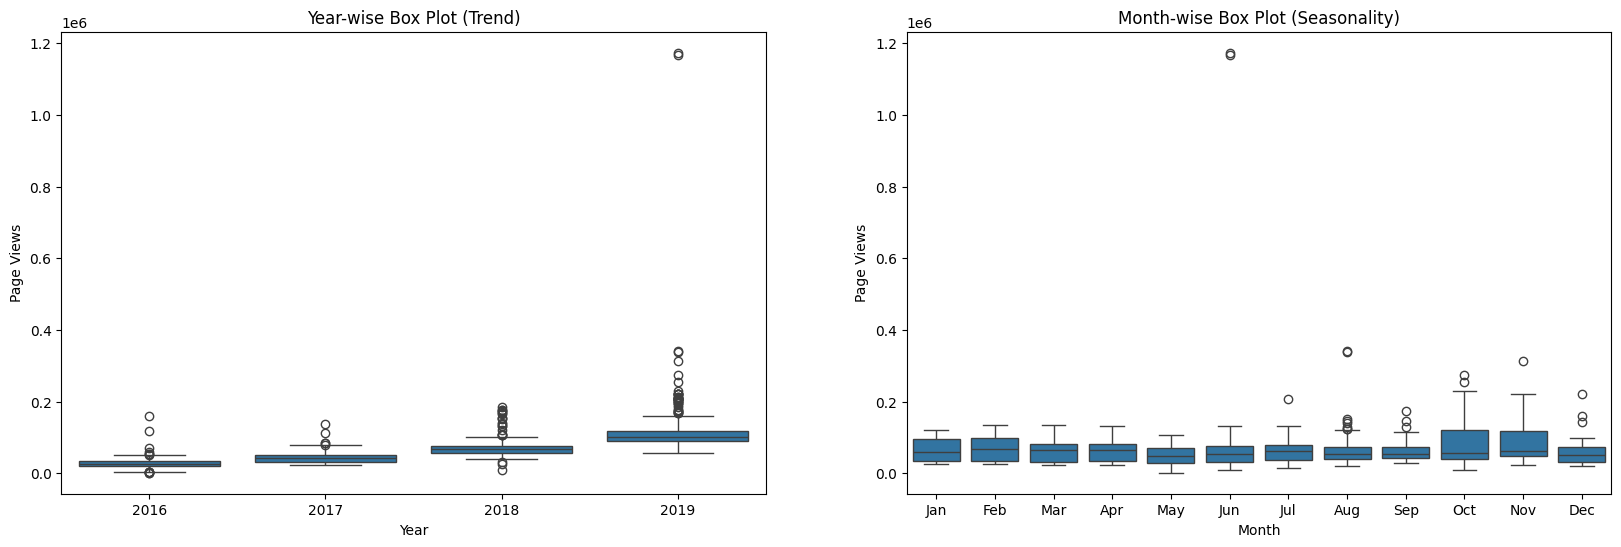

In [14]:

    # Read data
df = pd.read_csv('fcc-forum-pageviews.csv')
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

    # Prepare data for box plots (year and month columns)
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box['date']]
df_box['month'] = [d.strftime('%b') for d in df_box['date']]

    # Set correct month order
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

    # Draw plots
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

    # Year-wise Box Plot
sns.boxplot(x="year", y="value", data=df_box, ax=axes[0])
axes[0].set_title("Year-wise Box Plot (Trend)")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Page Views")

    # Month-wise Box Plot
sns.boxplot(x="month", y="value", data=df_box,
                order=month_order, ax=axes[1])
axes[1].set_title("Month-wise Box Plot (Seasonality)")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Page Views")

fig.show()
